In [ ]:
!pip install textblob

In [ ]:
pip install chart_studio

In [ ]:
pip install wordcloud

In [ ]:
pip install cufflinks --upgrade

In [53]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [54]:
from textblob import TextBlob
# import cufflinks as cf
# from plotly.offline import plot
import plotly.offline as py

In [55]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/arpitha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arpitha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [56]:
reddit_df = pd.read_csv('data_to_be_cleansed.csv').drop(columns='Unnamed: 0')

In [57]:
reddit_df.head()

,text,title,target
0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1
2,I cannot possibly imagine life without depress...,I remember thinking about people who had depre...,1
3,Yesterday my family was talking about differen...,Does depression affect your memory?,1
4,So aroung 6 months ago my girlfriend broke up ...,Enjoy life when you still have it.,1


In [58]:
reddit_df.shape

(9525, 3)

In [59]:
reddit_df.drop_duplicates(keep='first', inplace=True)

In [60]:
reddit_df.shape

(7068, 3)

In [61]:
reddit_df.isnull().sum()

text      2629
title        0
target       0
dtype: int64

In [62]:
reddit_df.fillna('missingtext', inplace=True)

In [63]:
reddit_df.isnull().sum()

text      0
title     0
target    0
dtype: int64

In [64]:
reddit_df.target.value_counts(normalize=True)

1    0.527448
0    0.472552
Name: target, dtype: float64

In [65]:
reddit_df.head(10)

,text,title,target
0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1
2,I cannot possibly imagine life without depress...,I remember thinking about people who had depre...,1
3,Yesterday my family was talking about differen...,Does depression affect your memory?,1
4,So aroung 6 months ago my girlfriend broke up ...,Enjoy life when you still have it.,1
5,"This is my first semester, and all my courses ...",Being in college during a pandemic feels absol...,1
6,Why do funerals cost $10 000 or more??? Or $15...,Life is a joke,1
7,except when im hungry. im only 15 but i feel l...,i havent left my bed in 6 days,1
8,My mom was suspicious of me and thought someth...,NOW MY MOM KNOWS I'M SUICIDAL AND DEPRESSED AN...,1
9,Every second I'm telling myself to fuck off an...,I'm so fuckin disgusted by myself that all I c...,1


In [66]:
reddit_df.to_csv('clean_data.csv')

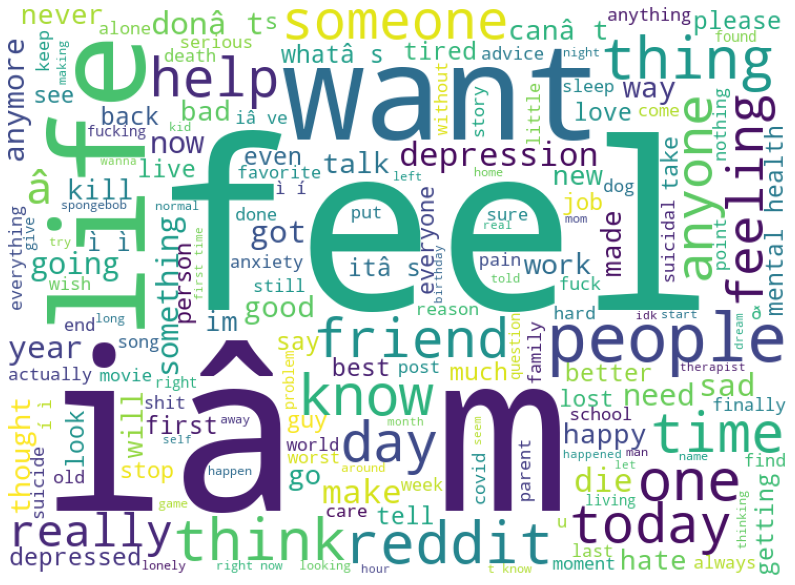

In [86]:
wc_df = pd.read_csv('clean_data.csv', encoding ='latin-1') 
  
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in wc_df.title: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 500,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='steelblue',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('reddit_wordcloud.png')

In [68]:
def preprocess(text):
    text = text.str.replace("(<br/>)", "")
    text = text.str.replace('(<a).*(>).*(</a>)', '')
    text = text.str.replace('(&amp)', '')
    text = text.str.replace('(&gt)', '')
    text = text.str.replace('(&lt)', '')
    text = text.str.replace('(\xa0)', ' ')  
    return text

df = pd.read_csv('clean_data.csv')

df['text'] = preprocess(df['text'])

df['polarity'] = df['text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [69]:
df

,Unnamed: 0,text,title,target,polarity,review_len,word_count
0,0,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1,0.132340,4792,771
1,1,Welcome to /r/depression's check-in post - a p...,"Regular Check-In Post. Plus, a reminder about ...",1,0.316830,1225,212
2,2,I cannot possibly imagine life without depress...,I remember thinking about people who had depre...,1,0.160065,331,61
3,3,Yesterday my family was talking about differen...,Does depression affect your memory?,1,0.013605,399,64
4,4,So aroung 6 months ago my girlfriend broke up ...,Enjoy life when you still have it.,1,0.290088,859,172
...,...,...,...,...,...,...,...
7063,9267,missingtext,"Don’t trust anyone, not even the old guy in a ...",0,0.000000,11,1
7064,9269,missingtext,I’ve come for your pickle,0,0.000000,11,1
7065,9270,missingtext,Screm,0,0.000000,11,1
7066,9271,missingtext,Clancy Krabs or Eugene H. Brown?,0,0.000000,11,1


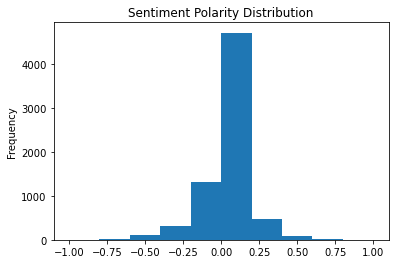

In [71]:
df['polarity'].plot(
    kind='hist',
    bins=10,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
    title='Sentiment Polarity Distribution')

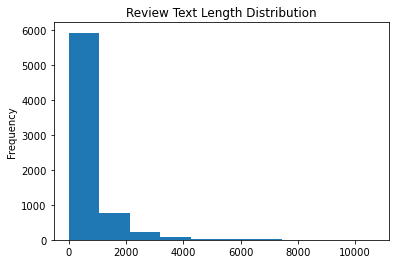

In [72]:
df['review_len'].plot(
    kind='hist',
    bins=10,
#     xTitle='review length',
#     linecolor='black',
#     yTitle='count',
    title='Review Text Length Distribution')

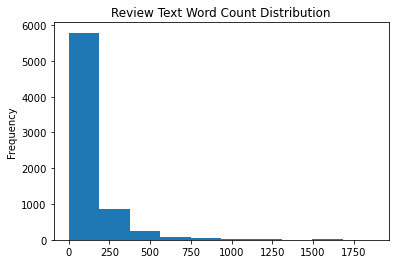

In [73]:
df['word_count'].plot(
    kind='hist',
    bins=10,
#     xTitle='word count',
#     linecolor='black',
#     yTitle='count',
    title='Review Text Word Count Distribution')

to 24809
and 23598
the 16505
my 15055
it 12375
of 10595
me 9739
that 9469
in 7860
but 7533
for 7101
just 6543
is 6332
have 6294
this 6024
so 5854
was 5453
with 5385
like 4922
be 4301


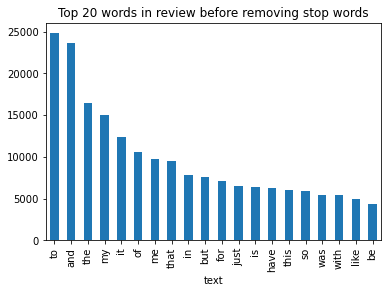

In [81]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review before removing stop words')
#yTitle='Count', linecolor='black', 

just 6543
like 4922
don 4164
feel 3928
know 3266
want 3072
ve 2952
missingtext 2629
life 2484
really 2365
time 2357
people 2186
think 1639
day 1442
friends 1420
things 1407
going 1358
years 1265
good 1246
help 1239


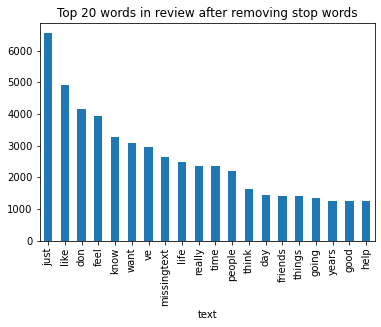

In [82]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df2.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words')

want to 2239
to be 1723
in the 1447
feel like 1361
to do 1229
in my 1202
of my 1141
of the 1090
my life 1085
don know 1051
to get 873
ve been 857
to me 808
it was 776
me and 759
and it 756
to the 730
with my 710
for the 708
going to 688


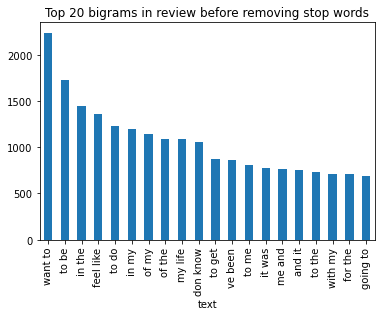

In [84]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review before removing stop words')

feel like 1372
don know 1147
don want 660
just want 477
mental health 378
just don 268
feels like 263
just feel 240
don think 205
felt like 187
want die 181
don feel 176
dont know 150
makes feel 141
years ago 139
high school 137
best friend 136
don really 128
like just 123
suicidal thoughts 122


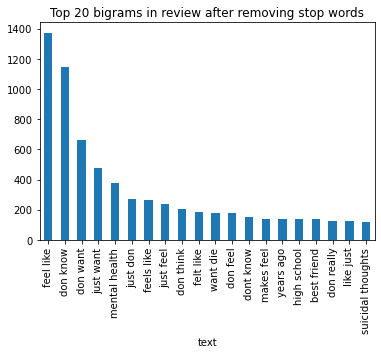

In [79]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

don want to 490
what to do 356
don know what 354
want to be 322
just want to 313
know what to 305
to talk to 277
in my life 273
be able to 201
all the time 199
don know how 198
know how to 190
of my life 181
want to die 175
don know if 160
to kill myself 157
at this point 155
want to do 149
my mental health 148
for me to 145


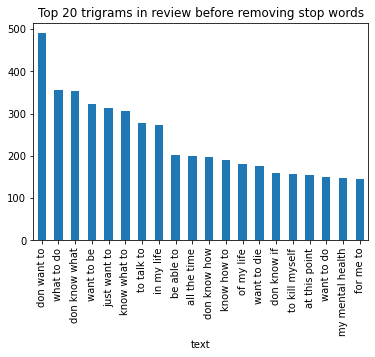

In [80]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

just feel like 52
fuck fuck fuck 46
just don know 42
don feel like 37
www reddit com 35
don know anymore 34
don want die 34
end end end 34
kill kill kill 34
https www reddit 32
feel like ve 31
don want live 27
feel like shit 27
feel like just 26
feel like don 25
just want die 24
don know just 23
make feel better 22
just don want 22
just want stop 21


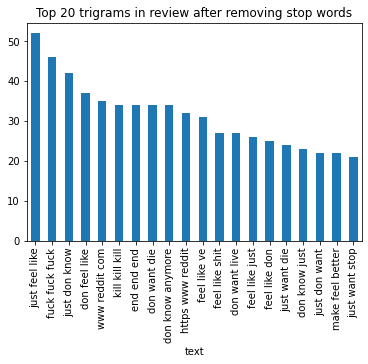

In [45]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['text'], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

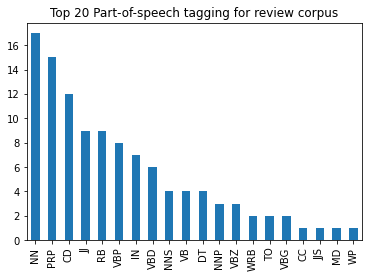

In [52]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(
    kind='bar',
    title='Top 20 Part-of-speech tagging for review corpus')